# The Movie Database API Exploration

# Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 250 pages
popular_movies = []

for PAGE in range(1, 251):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

In [5]:
page_number = []
id = []
original_language = []
popularity = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
    pg_num = page_number.append(pg['page']) 
    ids = id.append(pg['results'][0]['id']) 
    orig_lang = original_language.append(pg['results'][0]['original_language']) 
    pop = popularity.append(pg['results'][0]['popularity']) 
    rel_date = release_date.append(pg['results'][0]['release_date']) 
    tit = title.append(pg['results'][0]['title']) 
    vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
    vot_cnt = vote_count.append(pg['results'][0]['vote_count'])

In [6]:
data = {
  'page_number': page_number,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,id,original_language,popularity,release_date,title,vote_average,vote_count
0,1,453395,en,7647.020,2022-05-04,Doctor Strange in the Multiverse of Madness,7.6,2915
1,2,414906,en,1224.907,2022-03-01,The Batman,7.8,5275
2,3,785985,fr,682.526,2022-05-06,The Takedown,6.0,246
3,4,799876,en,572.253,2022-02-25,The Outfit,7.1,289
4,5,351286,en,427.223,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9961


In [7]:
df.drop(columns=['page_number'], inplace=True)         # drop page number and adult columns
df.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count
0,453395,en,7647.020,2022-05-04,Doctor Strange in the Multiverse of Madness,7.6,2915
1,414906,en,1224.907,2022-03-01,The Batman,7.8,5275
2,785985,fr,682.526,2022-05-06,The Takedown,6.0,246
3,799876,en,572.253,2022-02-25,The Outfit,7.1,289
4,351286,en,427.223,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9961


In [8]:
df.shape

(250, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 250 non-null    int64  
 1   original_language  250 non-null    object 
 2   popularity         250 non-null    float64
 3   release_date       250 non-null    object 
 4   title              250 non-null    object 
 5   vote_average       250 non-null    float64
 6   vote_count         250 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 13.8+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df['id'] = df['id'].astype('category')                        # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [13]:
df.describe(exclude='number')

,id,original_language,release_date,title
count,250,250,250,250
unique,250,14,241,250
top,62,en,2003-12-12,Doctor Strange in the Multiverse of Madness
freq,1,195,2,1


In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])       # convert release date to datetime
df.dtypes

id                         category
original_language            object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [15]:
df['year'] = df['release_date'].dt.year                       # extract year
df['month'] = df['release_date'].dt.month                     # extract month
df['day'] = df['release_date'].dt.day                         # extract day
df['day_name'] = df['release_date'].dt.day_name()             # extract day name
df['week'] = df['release_date'].dt.week                       # extract week
df['quarter']= df['release_date'].dt.quarter                  # extract quarter

df.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,7647.020,2022-05-04,Doctor Strange in the Multiverse of Madness,7.6,2915,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,414906,en,1224.907,2022-03-01,The Batman,7.8,5275,2022.0,3.0,1.0,Tuesday,9.0,1.0
2,785985,fr,682.526,2022-05-06,The Takedown,6.0,246,2022.0,5.0,6.0,Friday,18.0,2.0
3,799876,en,572.253,2022-02-25,The Outfit,7.1,289,2022.0,2.0,25.0,Friday,8.0,1.0
4,351286,en,427.223,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9961,2018.0,6.0,6.0,Wednesday,23.0,2.0


In [16]:
df.query("release_date == 'NaT'")                                # query movies without release date 

,id,original_language,popularity,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
58,695727,en,78.887,NaT,One Punch Man,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
123,975117,es,43.624,NaT,Father There Is Only One 3,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_dropna = df[~df['release_date'].isna()]                       # drop movies without release date
df_dropna.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,7647.020,2022-05-04,Doctor Strange in the Multiverse of Madness,7.6,2915,2022.0,5.0,4.0,Wednesday,18.0,2.0
1,414906,en,1224.907,2022-03-01,The Batman,7.8,5275,2022.0,3.0,1.0,Tuesday,9.0,1.0
2,785985,fr,682.526,2022-05-06,The Takedown,6.0,246,2022.0,5.0,6.0,Friday,18.0,2.0
3,799876,en,572.253,2022-02-25,The Outfit,7.1,289,2022.0,2.0,25.0,Friday,8.0,1.0
4,351286,en,427.223,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9961,2018.0,6.0,6.0,Wednesday,23.0,2.0


In [18]:
 # convert date information to integer
df_dropna[['year', 'month', 'day', 'week', 'quarter']] = df_dropna[['year', 'month', 'day', 'week', 'quarter']].applymap(lambda x: int(x))  
df_dropna.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,453395,en,7647.020,2022-05-04,Doctor Strange in the Multiverse of Madness,7.6,2915,2022,5,4,Wednesday,18,2
1,414906,en,1224.907,2022-03-01,The Batman,7.8,5275,2022,3,1,Tuesday,9,1
2,785985,fr,682.526,2022-05-06,The Takedown,6.0,246,2022,5,6,Friday,18,2
3,799876,en,572.253,2022-02-25,The Outfit,7.1,289,2022,2,25,Friday,8,1
4,351286,en,427.223,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9961,2018,6,6,Wednesday,23,2


In [19]:
# change day_name to categorical 
ordered_day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_dropna['day_name'] = pd.Categorical(df_dropna['day_name'], ordered_day_name)

df_dropna['day_name'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False)

In [20]:
df_dropna[['popularity', 'vote_average', 'vote_count']].describe()

,popularity,vote_average,vote_count
count,248.000000,248.000000,248.000000
mean,89.022790,6.488306,2141.459677
std,493.197916,1.397418,3627.857836
min,10.868000,0.000000,0.000000
25%,21.307250,6.100000,185.750000
50%,31.161500,6.800000,591.500000
75%,56.203250,7.300000,2335.750000
max,7647.020000,8.500000,21694.000000


In [21]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

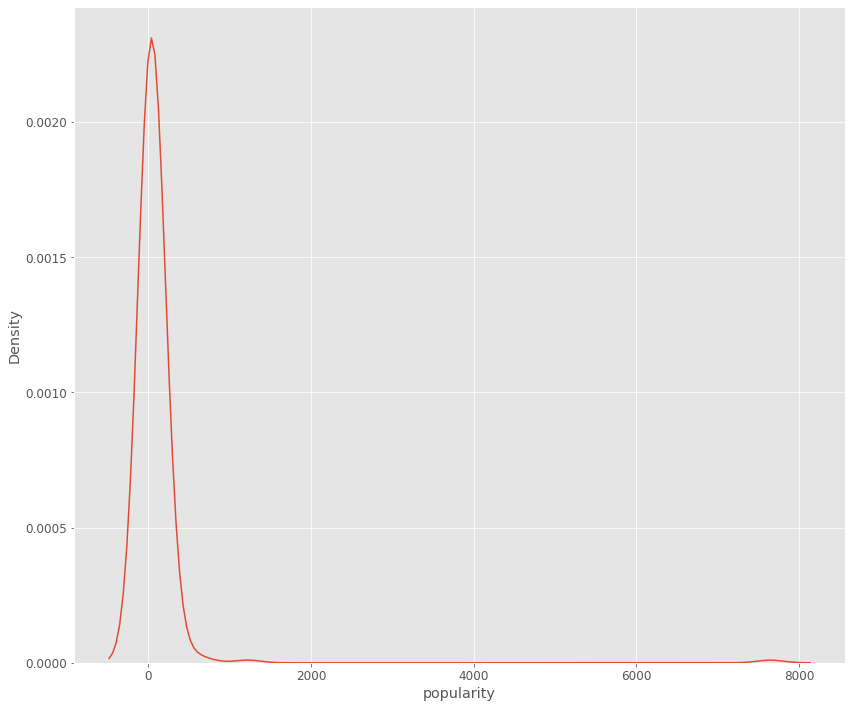

In [22]:
plotkde(data=df_dropna, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

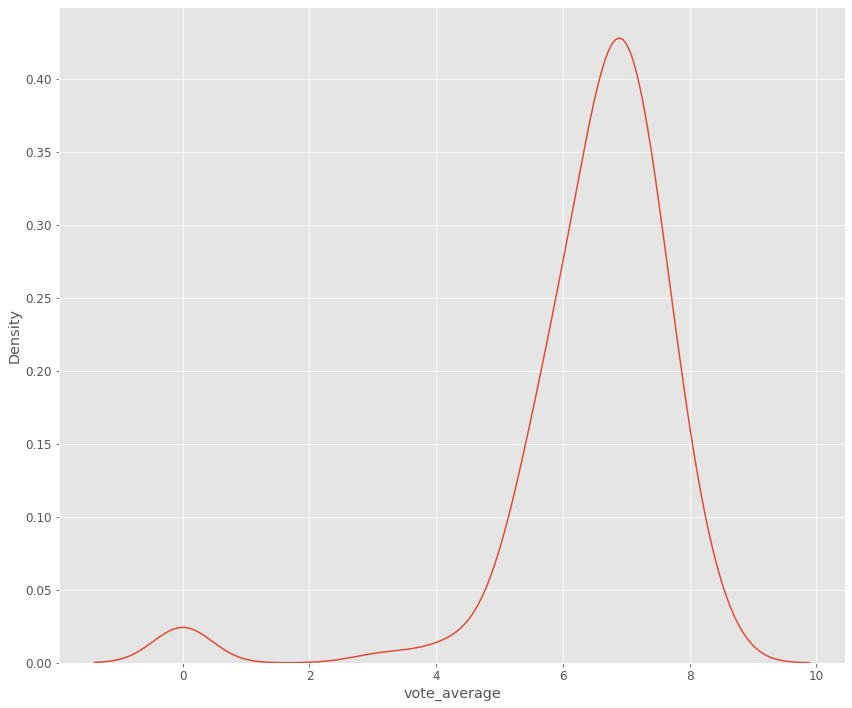

In [23]:
plotkde(data=df_dropna, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

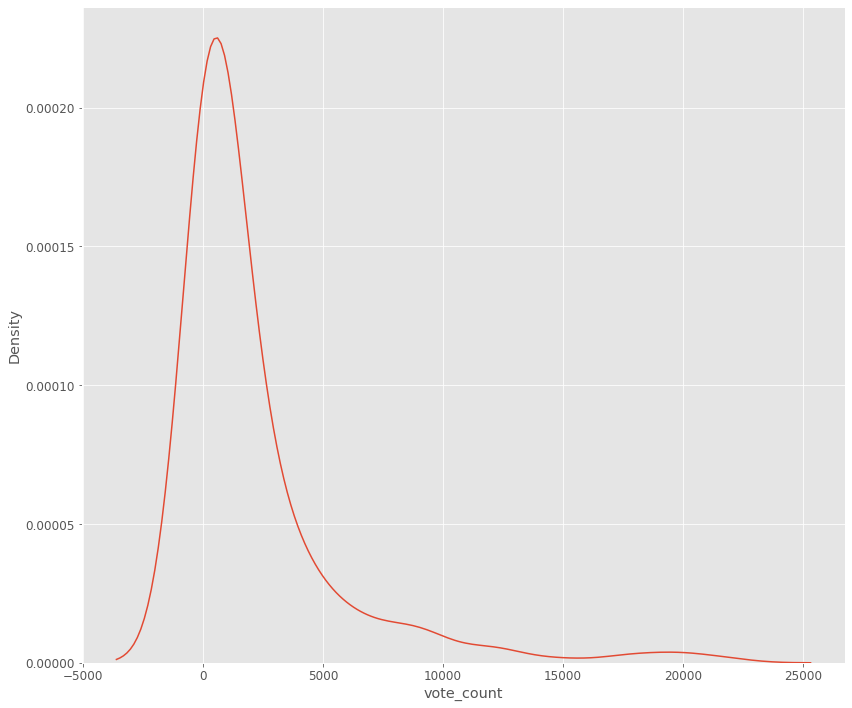

In [24]:
plotkde(data=df_dropna, x='vote_count')

# Missing Values Exploration

In [25]:
df_dropna.isna().sum()

id                   0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

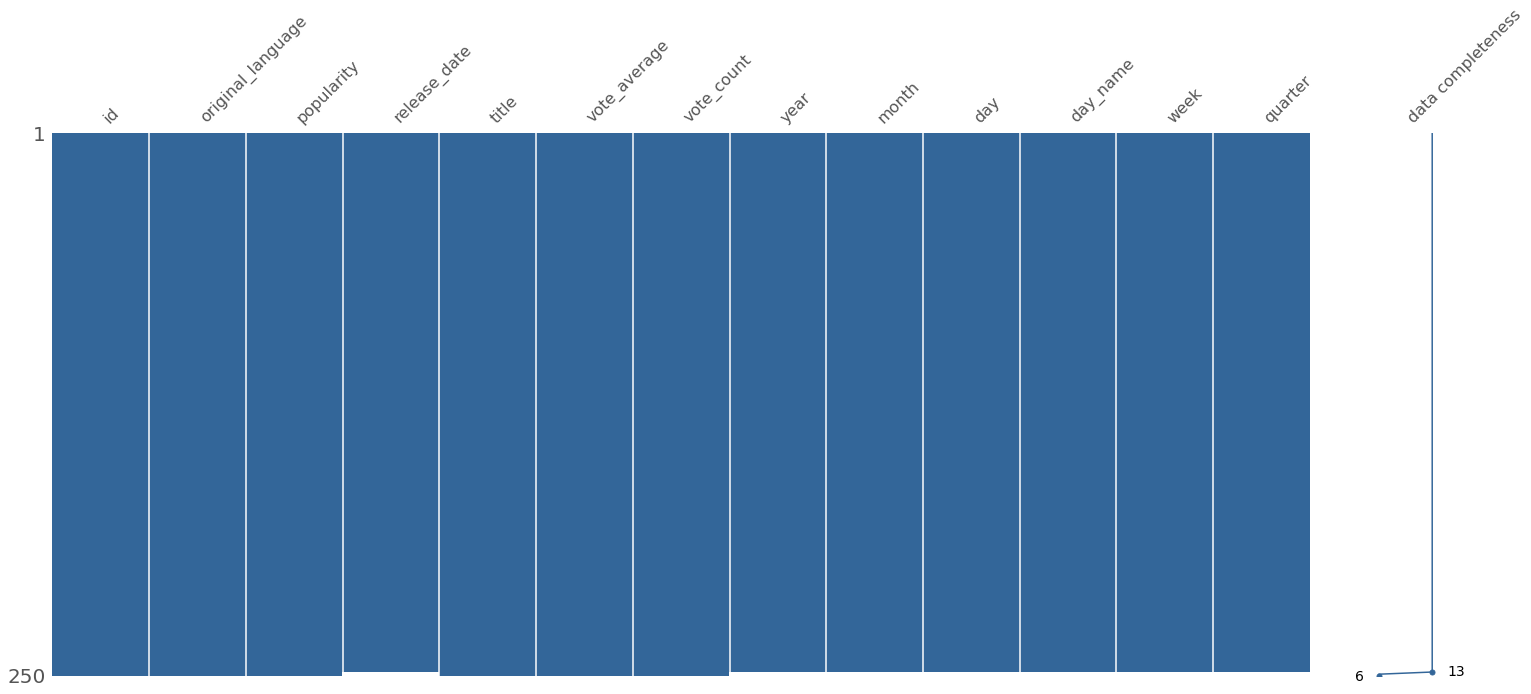

In [26]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [27]:
df.duplicated().sum()                                   # check for duplicates

0

In [28]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

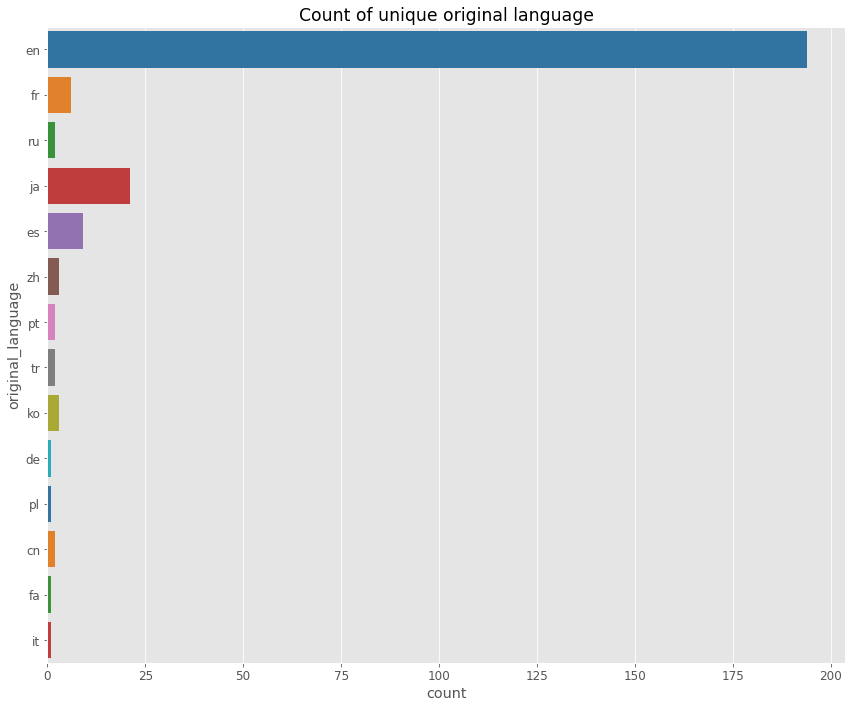

In [29]:
ax = sns.countplot(
  data=df_dropna, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

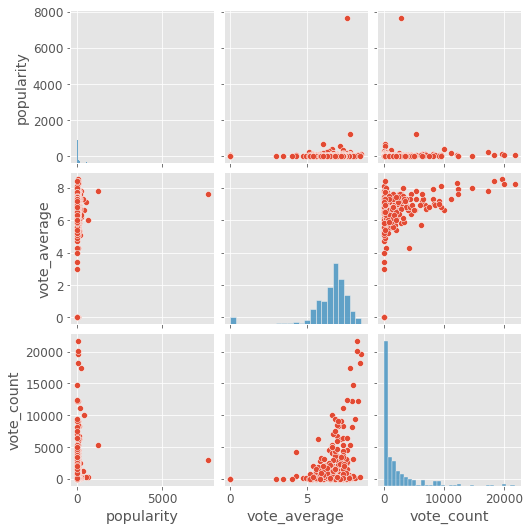

In [30]:
sns.pairplot(df_dropna[['popularity', 'vote_average', 'vote_count']])

In [31]:
df_corr = df_dropna[['popularity', 'vote_average', 'vote_count']].corr()     # compute pairwise correlation
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.067467,0.039741
vote_average,0.067467,1.000000,0.315989
vote_count,0.039741,0.315989,1.000000


<AxesSubplot:>

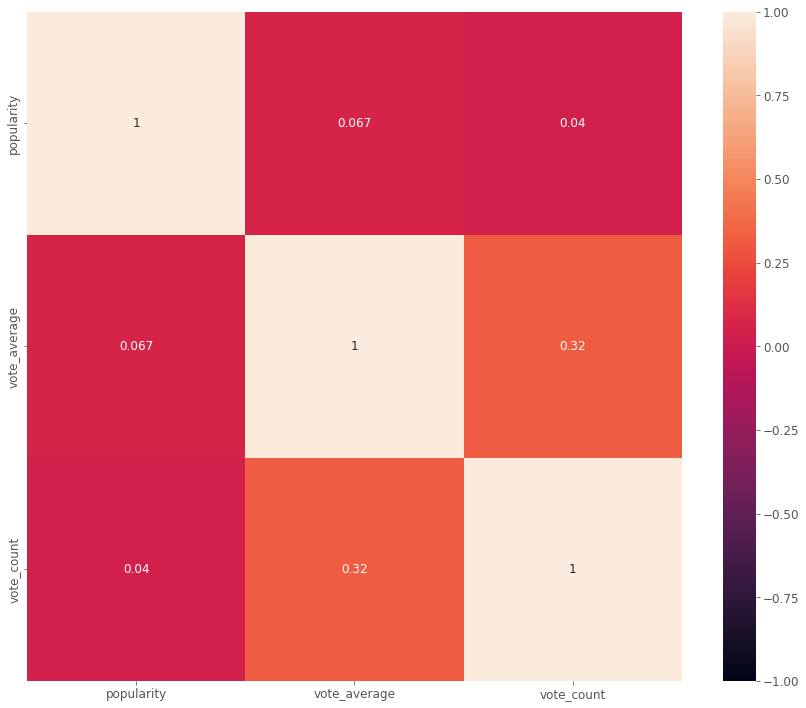

In [32]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [33]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

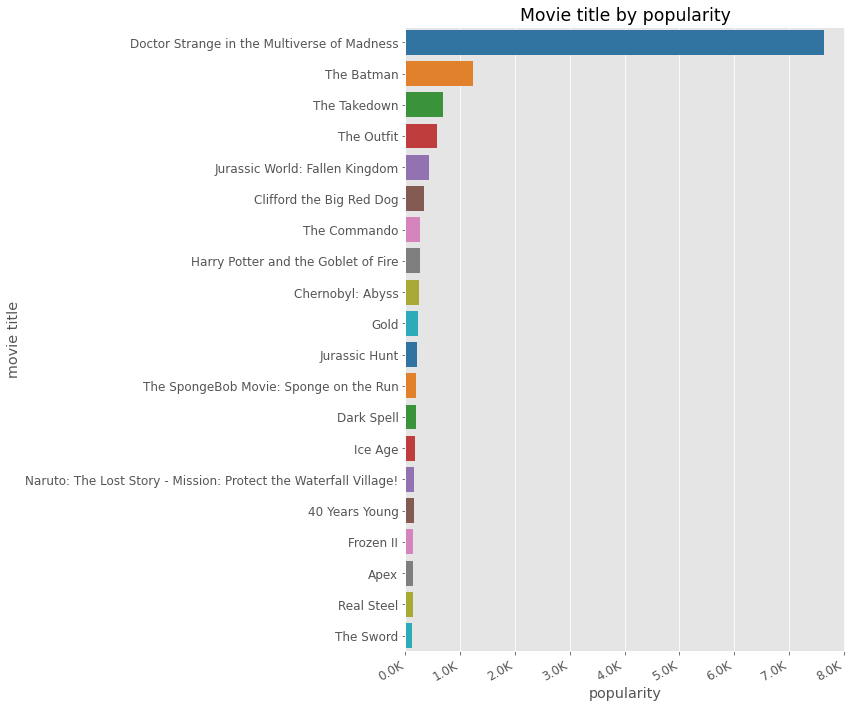

In [34]:
plot_bar(
  data=df_dropna.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='popularity', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

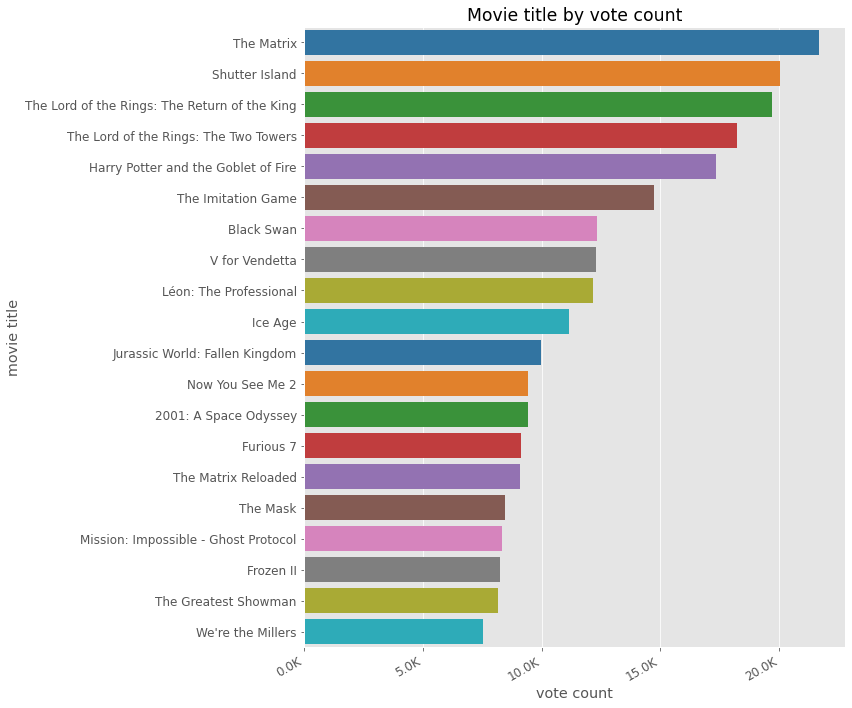

In [35]:
plot_bar(
  data=df_dropna.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='vote count', ylabel='movie title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

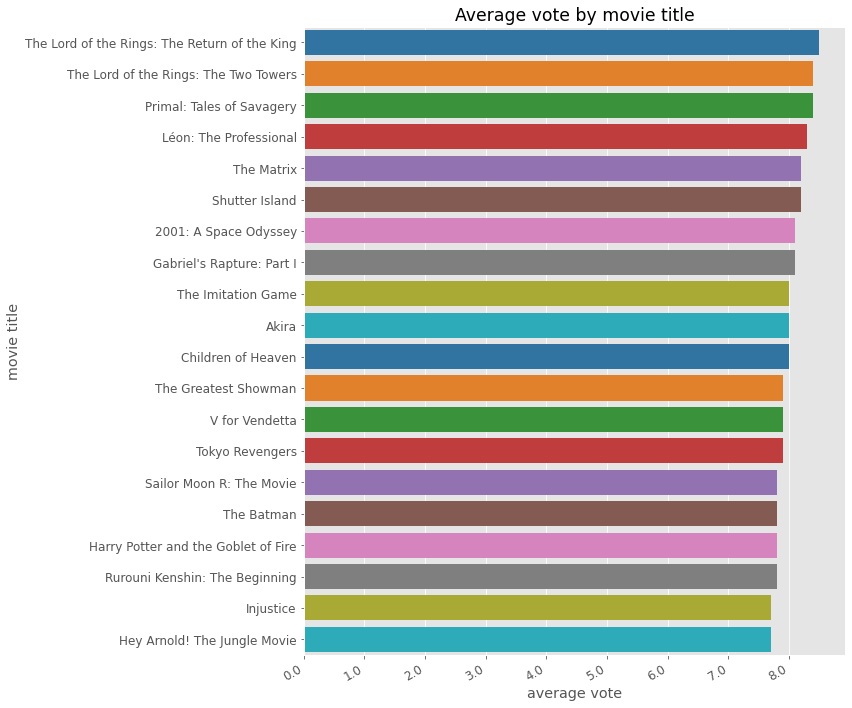

In [36]:
plot_bar(
  data=df_dropna.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Average vote by movie title', xlabel='average vote', ylabel='movie title',
  formatter=format_orig
)

# Movie Popularity Exploration

[Text(0.5, 1.0, 'Movie popularity by day name'),
 Text(0.5, 0, 'day name'),
 Text(0, 0.5, 'popularity')]

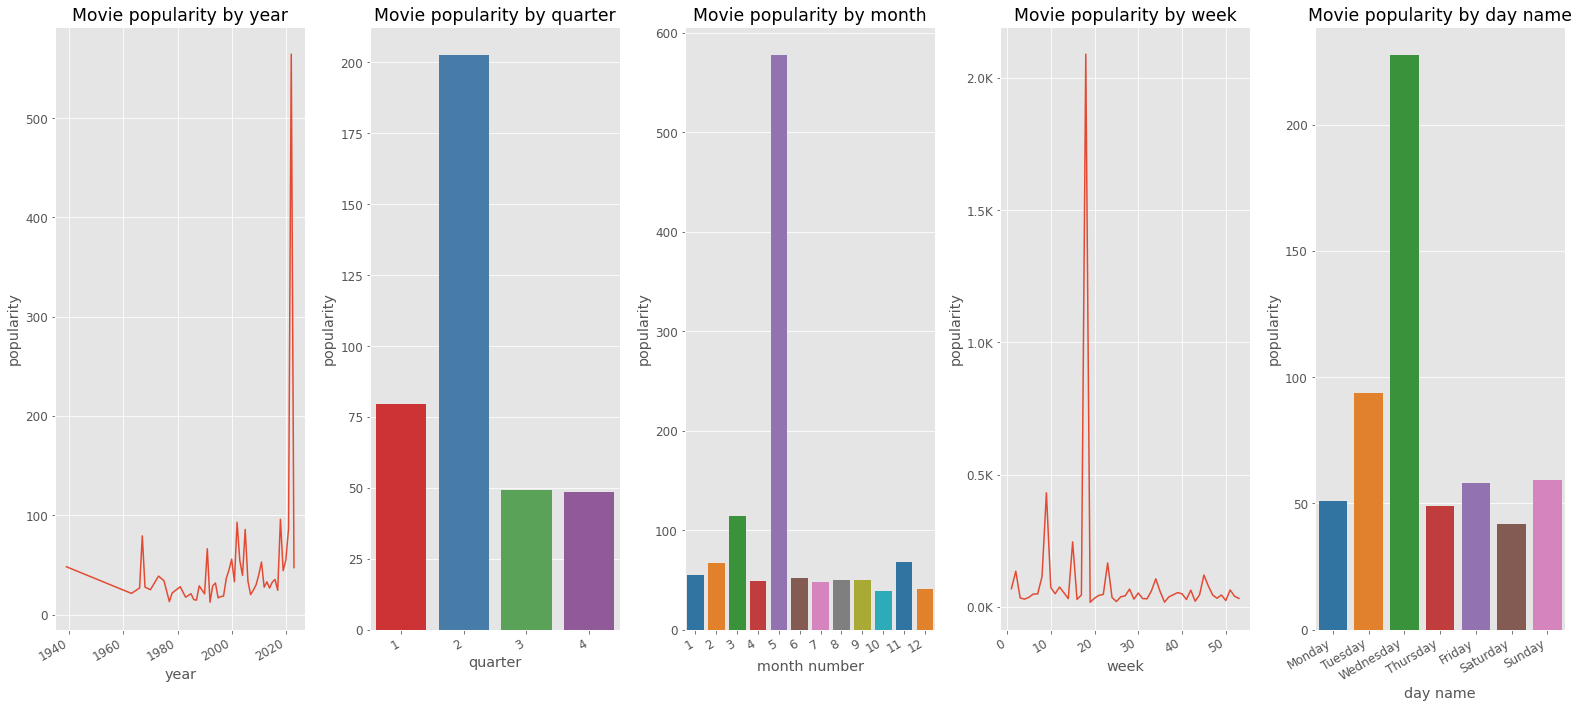

In [37]:
# create figure and axis
fig, axs = plt.subplots(1, 5, figsize=(22, 10))
fig.autofmt_xdate()

# plot popularity by year
sns.lineplot(data=df_dropna, x='year', y='popularity', ci=None, ax=axs[0])
axs[0].set(title='Movie popularity by year', xlabel='year', ylabel='popularity')

# plot popularity by quarter
sns.barplot(data=df_dropna, x='quarter', y='popularity', ci=None, ax=axs[1], palette='Set1')
axs[1].set(title='Movie popularity by quarter', xlabel='quarter', ylabel='popularity')

# plot popularity by month
sns.barplot(data=df_dropna, x='month', y='popularity', ci=None, ax=axs[2], palette='tab10')
axs[2].set(title='Movie popularity by month', xlabel='month number', ylabel='popularity')

# plot popularity by week
sns.lineplot(data=df_dropna, x='week', y='popularity', ci=None, ax=axs[3])
axs[3].set(title='Movie popularity by week', xlabel='week', ylabel='popularity')
axs[3].yaxis.set_major_formatter(format_tsd)

# plot popularity by name of the day
sns.barplot(data=df_dropna, x='day_name', y='popularity', ci=None, palette='tab10', ax=axs[4])
axs[4].set(title='Movie popularity by day name', xlabel='day name', ylabel='popularity')

# Vote Average Exploration

[Text(0.5, 1.0, 'Average movie vote by day name'),
 Text(0.5, 0, 'day name'),
 Text(0, 0.5, 'vote average')]

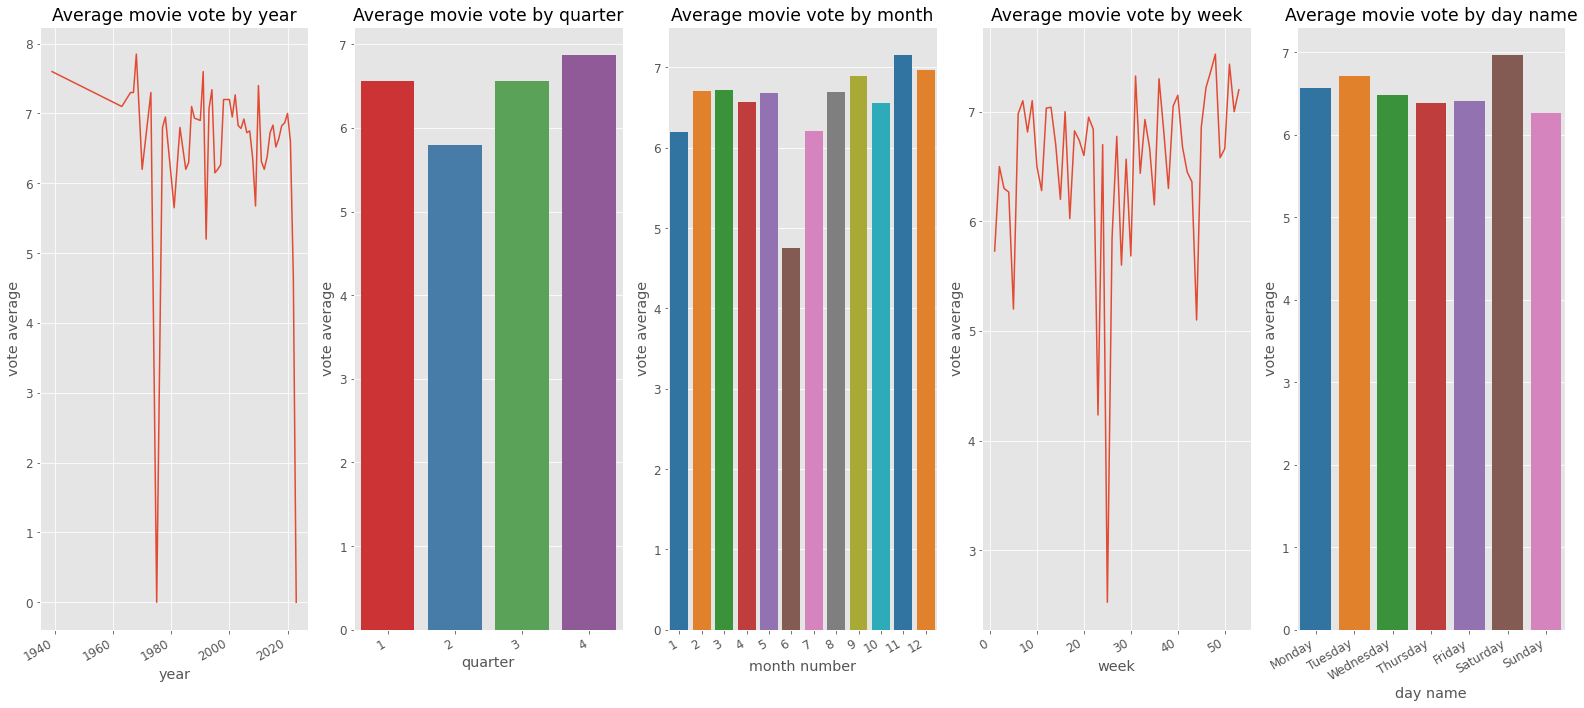

In [38]:
# create figure and axis
fig, axs = plt.subplots(1, 5, figsize=(22, 10))
fig.autofmt_xdate()

# plot popularity by year
sns.lineplot(data=df_dropna, x='year', y='vote_average', ci=None, ax=axs[0])
axs[0].set(title='Average movie vote by year', xlabel='year', ylabel='vote average')

# plot popularity by quarter
sns.barplot(data=df_dropna, x='quarter', y='vote_average', ci=None, ax=axs[1], palette='Set1')
axs[1].set(title='Average movie vote by quarter', xlabel='quarter', ylabel='vote average')

# plot popularity by month
sns.barplot(data=df_dropna, x='month', y='vote_average', ci=None, ax=axs[2], palette='tab10')
axs[2].set(title='Average movie vote by month', xlabel='month number', ylabel='vote average')

# plot popularity by week
sns.lineplot(data=df_dropna, x='week', y='vote_average', ci=None, ax=axs[3])
axs[3].set(title='Average movie vote by week', xlabel='week', ylabel='vote average')

# plot popularity by name of the day
sns.barplot(data=df_dropna, x='day_name', y='vote_average', ci=None, palette='tab10', ax=axs[4])
axs[4].set(title='Average movie vote by day name', xlabel='day name', ylabel='vote average')

# Vote Count Exploration

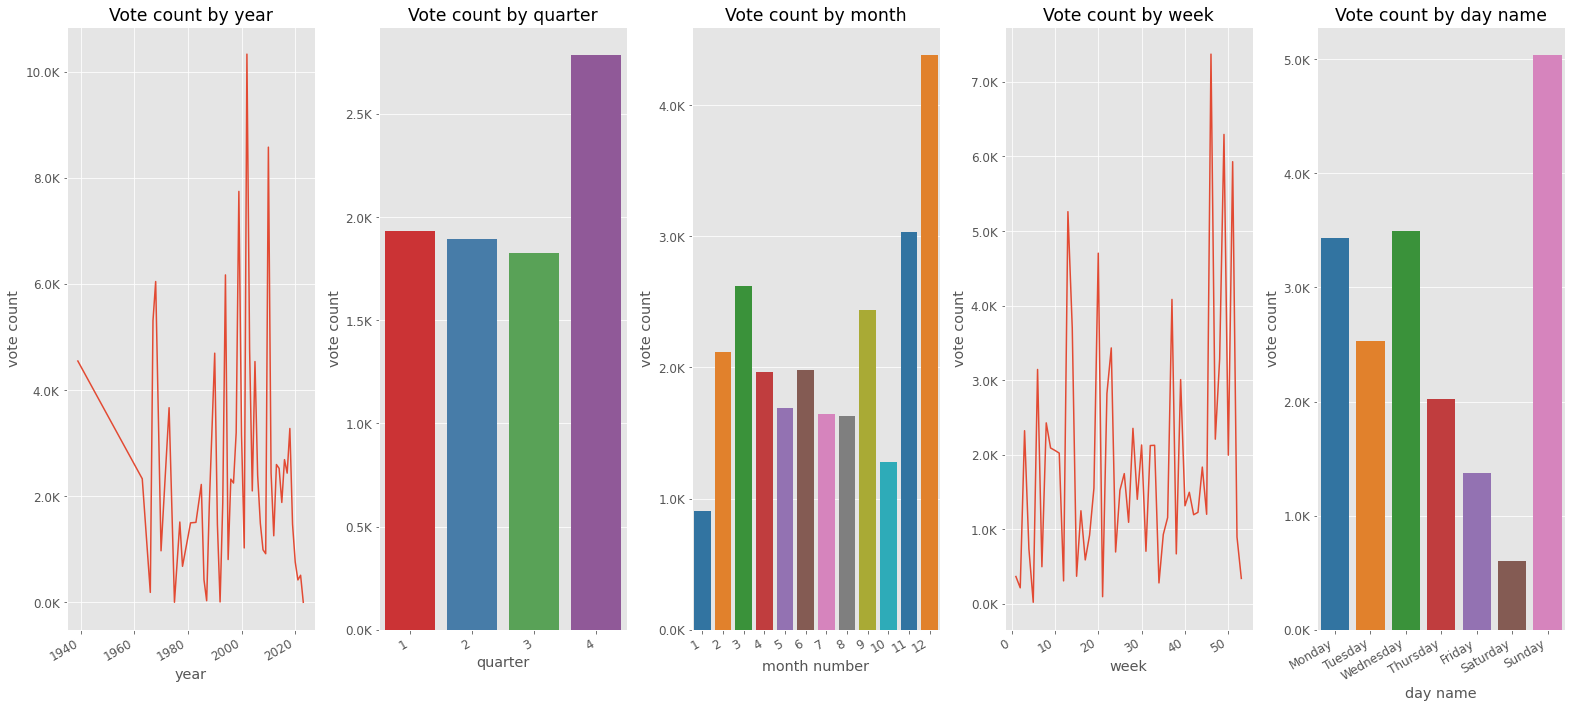

In [39]:
# create figure and axis
fig, axs = plt.subplots(1, 5, figsize=(22, 10))
fig.autofmt_xdate()

# plot popularity by year
sns.lineplot(data=df_dropna, x='year', y='vote_count', ci=None, ax=axs[0])
axs[0].set(title='Vote count by year', xlabel='year', ylabel='vote count')

# plot popularity by quarter
sns.barplot(data=df_dropna, x='quarter', y='vote_count', ci=None, ax=axs[1], palette='Set1')
axs[1].set(title='Vote count by quarter', xlabel='quarter', ylabel='vote count')

# plot popularity by month
sns.barplot(data=df_dropna, x='month', y='vote_count', ci=None, ax=axs[2], palette='tab10')
axs[2].set(title='Vote count by month', xlabel='month number', ylabel='vote count')

# plot popularity by week
sns.lineplot(data=df_dropna, x='week', y='vote_count', ci=None, ax=axs[3])
axs[3].set(title='Vote count by week', xlabel='week', ylabel='vote count')

# plot popularity by name of the day
sns.barplot(data=df_dropna, x='day_name', y='vote_count', ci=None, palette='tab10', ax=axs[4])
axs[4].set(title='Vote count by day name', xlabel='day name', ylabel='vote count')


# format y-axes
for axx in axs:
  axx.yaxis.set_major_formatter(format_tsd)